## Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

## Bases de dados

In [2]:
iris = datasets.load_iris

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [4]:
batimentos = pd.read_csv("batimentos cardiacos.csv")
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [5]:
colesterol = pd.read_csv("colesterol.csv")
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


## Treinando os dados

In [6]:
x = diabetes.drop("resultado", axis = 1)
y = diabetes["resultado"]

In [7]:
SEED = 4121988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

### Classificação

In [8]:
clf_arvore = DecisionTreeClassifier(random_state = SEED, max_depth = 3)

In [9]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=4121988)

In [10]:
clf_arvore.score(x_teste, y_teste)

0.7552083333333334

In [11]:
clf_dummy = DummyClassifier(strategy = "most_frequent", random_state = SEED)

In [12]:
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(random_state=4121988, strategy='most_frequent')

In [13]:
clf_dummy.score(x_teste, y_teste)

0.7447916666666666

c:\users\usuário\opencv\lib\site-packages\sklearn\tree\_export.py:186: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 1.0 (renaming of 0.25).
  FutureWarning)


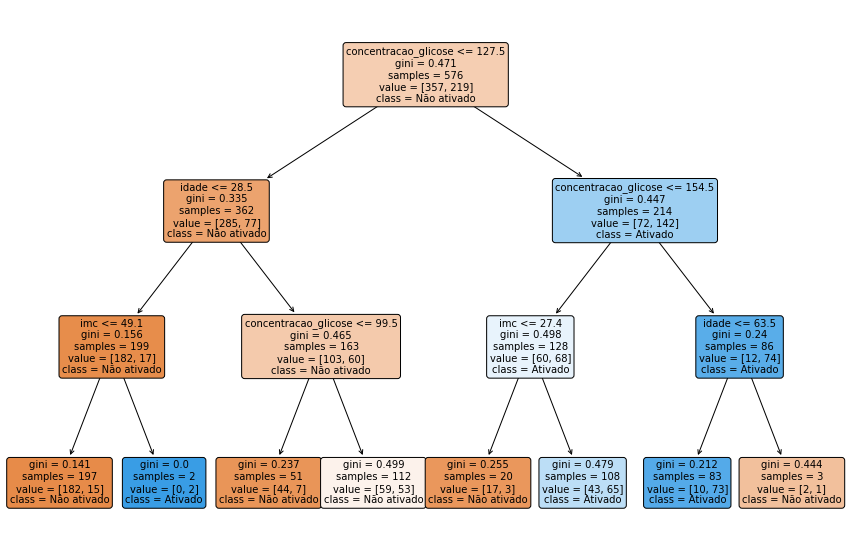

In [14]:
fig, ax = plt.subplots(figsize = (15, 10))
tree.plot_tree(
    clf_arvore,
    ax = ax,
    fontsize = 10,
    rounded = True,
    filled = True,
    feature_names = x_treino.columns,
    class_names = ["Não ativado", "Ativado"],
    rotate = True
)

plt.show()

### Regressão

<Figure size 7200x3600 with 0 Axes>

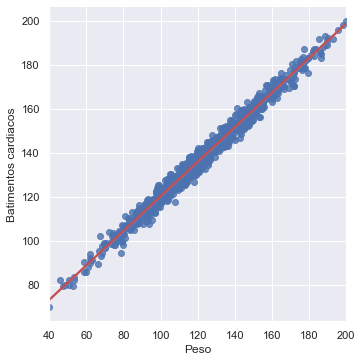

In [15]:
sns.set()
plt.figure(figsize = (100, 50))

sns.lmplot(x = "Peso", y = "Batimentos cardiacos", data = batimentos, line_kws = {"color": "r"})
plt.show()

In [16]:
x = batimentos[["Peso", "Idade"]]
y = batimentos["Batimentos cardiacos"]

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED)

In [18]:
rgs = linear_model.LinearRegression(fit_intercept = False, normalize = True)

In [19]:
rgs.fit(x_treino, y_treino)

LinearRegression(fit_intercept=False, normalize=True)

In [20]:
rgs.score(x_teste, y_teste)

0.9867270016177966

### Clusterização

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

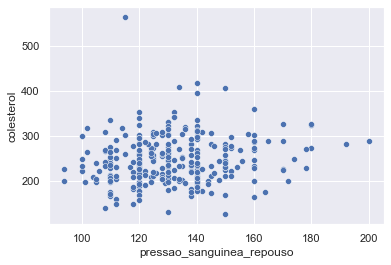

In [21]:
sns.scatterplot(x = "pressao_sanguinea_repouso", y = "colesterol", data = colesterol)

In [22]:
kmeans = KMeans(n_clusters = 2, random_state = SEED)

In [23]:
x = colesterol.select_dtypes("int64")

In [24]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   idade                      303 non-null    int64
 1   genero                     303 non-null    int64
 2   tipo_dor_peito             303 non-null    int64
 3   pressao_sanguinea_repouso  303 non-null    int64
 4   acucar_jejum               303 non-null    int64
 5   resultado_eletrocardio     303 non-null    int64
 6   freq_cardio_max            303 non-null    int64
 7   angina_exercicio           303 non-null    int64
 8   inclinacao                 303 non-null    int64
 9   diag_doenca_cardiaca       303 non-null    int64
 10  colesterol                 303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [26]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=4121988)

In [27]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

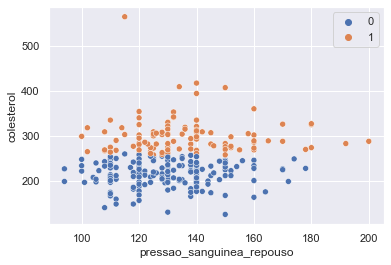

In [28]:
sns.scatterplot(x = "pressao_sanguinea_repouso", y = "colesterol", data = colesterol, hue = kmeans.labels_)

In [29]:
colesterol["clusters"] = kmeans.labels_

In [30]:
colesterol.groupby("clusters")["colesterol"].mean()

clusters
0    216.473958
1    298.963964
Name: colesterol, dtype: float64